#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 10
**CH10A Understanding the gender difference in earnings**

using the cps-earnings dataset

version 2.0 2024-09-13

In [ ]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from datetime import datetime
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mizani import transforms
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import pyfixest as pf

warnings.filterwarnings("ignore")


In [ ]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/cps-earnings/clean/"
data_out = dirname + "da_case_studies/ch10-gender-earnings-understand/"
output = dirname + "da_case_studies/ch10-gender-earnings-understand/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


In [ ]:
# Import the prewritten helper functions
from py_helper_functions import *


In [ ]:
cps = pd.read_csv("C:/Users/alexa/Documents/da_data_repo/morg2014.csv")

In [ ]:
cps = cps.query("uhourse>=20 & earnwke>0 & age>=24 & age<=64 & grade92>=44")


In [ ]:
# CREATE VARIABLES
cps["female"] = (cps.sex == 2).astype(int)
cps["w"] = cps["earnwke"] / cps["uhourse"]
cps["lnw"] = np.log(cps["w"])
## Write out to csv
cps.to_csv(data_out + "earnings_multireg.csv")


In [ ]:
#####################
# DISTRIBUTION OF EARNINGS
#######################
cps.loc[:, ["earnwke", "uhourse", "w"]].describe()


,earnwke,uhourse,w
count,18241.00000,18241.000000,18241.000000
mean,1481.78936,42.970780,34.525791
std,747.92426,9.139368,16.654215
min,0.01000,20.000000,0.000200
25%,923.00000,40.000000,21.634500
50%,1346.00000,40.000000,31.250000
75%,1923.07000,47.000000,45.673000
max,2884.61000,99.000000,144.230500


In [ ]:
cps.loc[cps.w >= 1, ["earnwke", "uhourse", "w"]].describe()


,earnwke,uhourse,w
count,18220.000000,18220.000000,18220.000000
mean,1483.491212,42.970088,34.565432
std,746.672256,9.135281,16.622801
min,38.000000,20.000000,1.025556
25%,923.000000,40.000000,21.634500
50%,1346.000000,40.000000,31.250000
75%,1923.070000,47.000000,45.673000
max,2884.610000,99.000000,144.230500


### Table 10.1 Gender differences in earnings – log earnings and gender

In [ ]:
# use robust std
reg = pf.feols(fml="lnw~female", data=cps, vcov = "hetero")
reg2 = pf.feols(fml="lnw~female+age", data=cps, vcov = "hetero")
reg3 = pf.feols(fml="age~female", data=cps, vcov = "hetero")


In [ ]:
pf.etable([reg, reg2, reg3], digits = 4)

GT(_tbl_data=                                      (1)  ...                       (3)     rowtype
0     Intercept   3.5145*** <br> (0.0061)  ...  44.6297*** <br> (0.1158)        coef
1        female  -0.1953*** <br> (0.0085)  ...  -1.4844*** <br> (0.1592)        coef
2           age                            ...                                  coef
3             0                         x  ...                         x          fe
4  Observations                     18241  ...                     18241  modelstats
5     S.E. type                    hetero  ...                    hetero  modelstats
6            R2                    0.0283  ...                    0.0047  modelstats

[7 rows x 5 columns], _body=<great_tables._gt_data.Body object at 0x0000017A0041EF20>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.stub: 2>, column_label='', column_align='left', column_width=None), ColInfo(var='(1)', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='(2)', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='(3)', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='rowtype', type=<ColInfoTypeEnum.row_group: 3>, column_label='rowtype', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000017A003A7C70>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['(1)', '(2)'], built=None), SpannerInfo(spanner_id='age', spanner_level=1, spanner_label='age', spanner_units=None, spanner_pattern=None, vars=['(3)'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x0000017A0031AC80>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=T

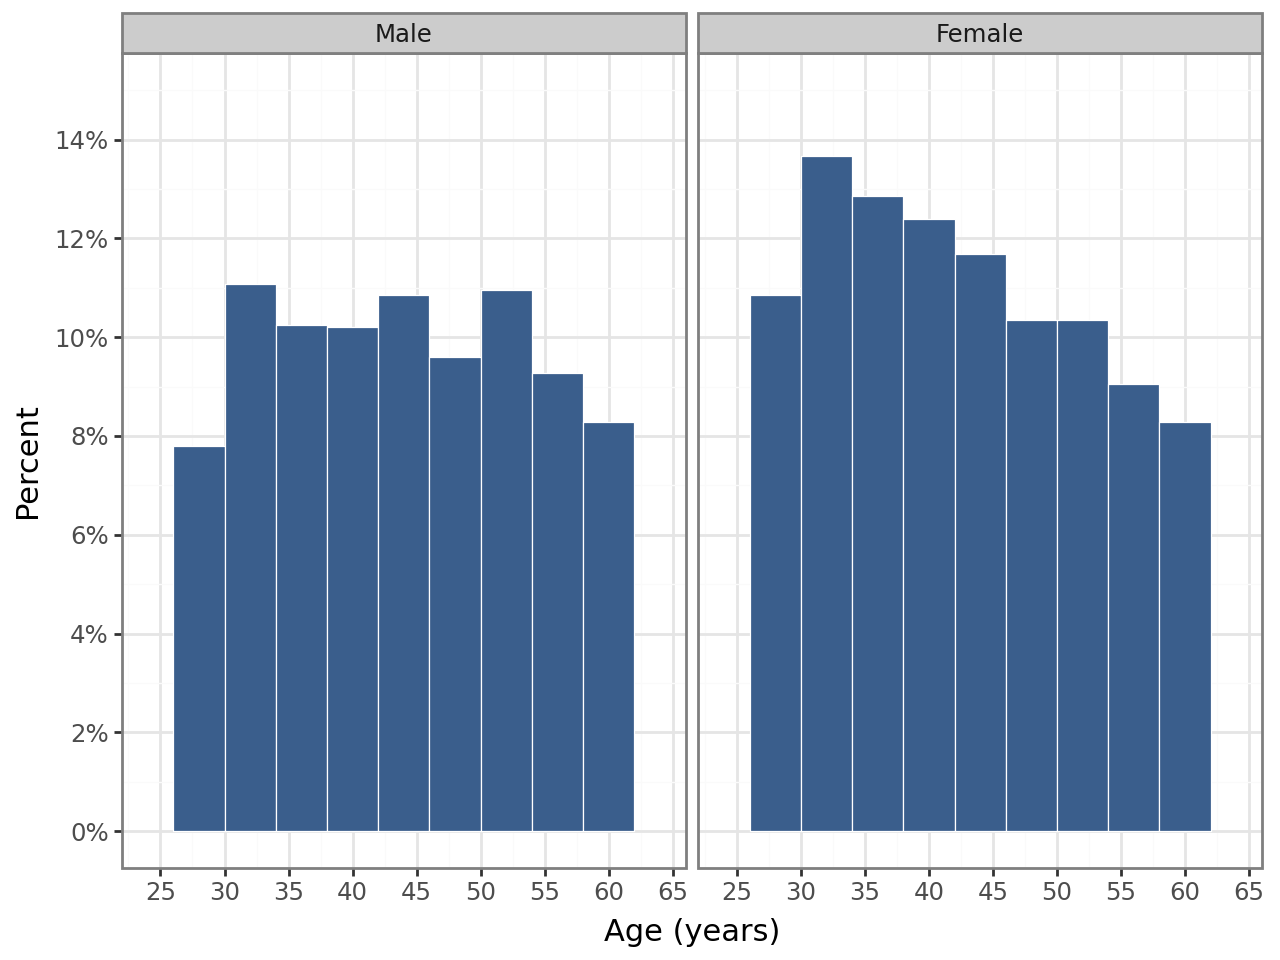

In [ ]:
(
    ggplot(cps, aes(x="age", y="2*stat(count)/sum(stat(count))"))
    + geom_histogram(
        binwidth=4,
        color="white",
        fill=color[0],
        size=0.25,
        alpha=0.8,
        show_legend=False,
        na_rm=True,
    )
    + labs(x="Age (years)", y="Percent")
    + facet_wrap("~female", labeller={"0": "Male", "1": "Female"})
    + labs(x="Age (years)", y="Percent")
    + scale_x_continuous(
        limits=(24, 64),
        breaks=seq(25, 65, by=5),
    )
    + scale_y_continuous(
        limits=(0, 0.15), breaks=seq(0, 0.15, by=0.02), labels=percent_format()
    )
    + theme_bw()
)


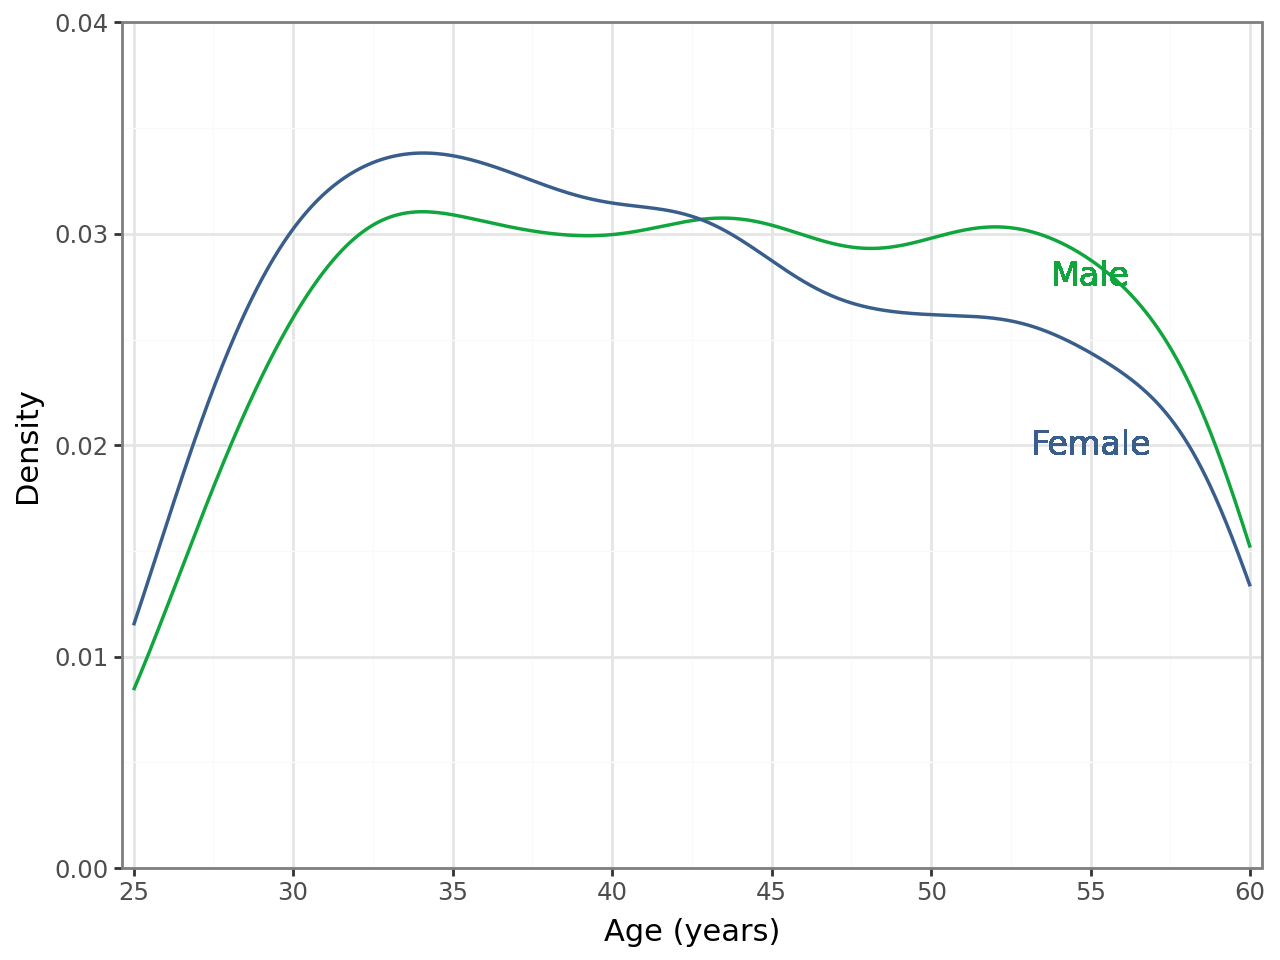

In [ ]:
(
    ggplot(cps, aes(x="age", y="stat(density)", color="factor(female)"))
    + geom_density(adjust=1.5, show_legend=False, na_rm=True, size=0.7)
    + labs(x="Age (years)", y="Density", color="")
    + scale_color_manual(
        name="", values=(color[1], color[0]), labels=("Male", "Female")
    )
    + scale_x_continuous(expand=(0.01, 0.01), limits=(25, 60), breaks=seq(25, 60, by=5))
    + scale_y_continuous(
        expand=(0.0, 0.0), limits=(0, 0.04), breaks=seq(0, 0.04, by=0.01)
    )
    + geom_text(aes(x=55, y=0.028, label="'Male'"), color=color[1], size=12)
    + geom_text(aes(x=55, y=0.020, label="'Female'"), color=color[0], size=12)
    + theme_bw()
)


### Table 10.2 Gender differences in earnings – log earnings and age, various functional forms

In [ ]:
reg4 = pf.feols(fml="lnw~female", data=cps, vcov = "hetero")
reg5 = pf.feols(fml="lnw~female+poly(age, 1)", data=cps, vcov = "hetero")
reg6 = pf.feols(fml="lnw~female+poly(age,2)", data=cps, vcov = "hetero")
reg7 = pf.feols(fml="lnw~female+poly(age,4)", data=cps, vcov = "hetero")


In [ ]:
pf.etable([reg4, reg5, reg6, reg7])


GT(_tbl_data=                                        (1)  ...                     (4)     rowtype
0         Intercept   3.514*** <br> (0.006)  ...   -3.606** <br> (1.178)        coef
1            female  -0.195*** <br> (0.008)  ...  -0.183*** <br> (0.008)        coef
2               age                          ...   0.572*** <br> (0.116)        coef
3  np.power(age, 2)                          ...  -0.017*** <br> (0.004)        coef
4  np.power(age, 3)                          ...   0.000*** <br> (0.000)        coef
5  np.power(age, 4)                          ...   -0.000** <br> (0.000)        coef
6                 0                       x  ...                       x          fe
7      Observations                   18241  ...                   18241  modelstats
8         S.E. type                  hetero  ...                  hetero  modelstats
9                R2                   0.028  ...                   0.062  modelstats

[10 rows x 6 columns], _body=<great_tables._gt_data.Body object at 0x0000017A03464430>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.stub: 2>, column_label='', column_align='left', column_width=None), ColInfo(var='(1)', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='(2)', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='(3)', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='(4)', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None), ColInfo(var='rowtype', type=<ColInfoTypeEnum.row_group: 3>, column_label='rowtype', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000017A1C082440>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['(1)', '(2)', '(3)', '(4)'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x0000017A00608100>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value

### Table 10.3 Gender differences in earnings – log earnings, gender and education

In [ ]:
cps["ed_MA"] = (cps["grade92"] == 44).astype(int)
cps["ed_Profess"] = (cps["grade92"] == 45).astype(int)
cps["ed_Phd"] = (cps["grade92"] == 46).astype(int)


In [ ]:
reg8 = pf.feols(fml="lnw~female", data=cps, vcov = "hetero")
reg9 = pf.feols(fml="lnw~female + ed_Profess + ed_Phd", data=cps, vcov = "hetero")
reg10 = pf.feols(fml="lnw~female + ed_Profess + ed_MA", data=cps, vcov = "hetero")


In [ ]:
pf.etable([reg8, reg9, reg10])

GT(_tbl_data=                                    (1)  ...                     (3)     rowtype
0     Intercept   3.514*** <br> (0.006)  ...   3.609*** <br> (0.013)        coef
1        female  -0.195*** <br> (0.008)  ...  -0.182*** <br> (0.009)        coef
2    ed_Profess                          ...     -0.002 <br> (0.018)        coef
3        ed_Phd                          ...                                coef
4         ed_MA                          ...  -0.136*** <br> (0.013)        coef
5             0                       x  ...                       x          fe
6  Observations                   18241  ...                   18241  modelstats
7     S.E. type                  hetero  ...                  hetero  modelstats
8            R2                   0.028  ...                   0.038  modelstats

[9 rows x 5 columns], _body=<great_tables._gt_data.Body object at 0x0000017A0F178550>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.stub: 2>, column_label='', column_align='left', column_width=None), ColInfo(var='(1)', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='(2)', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='(3)', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='rowtype', type=<ColInfoTypeEnum.row_group: 3>, column_label='rowtype', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000017A0DA23130>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['(1)', '(2)', '(3)'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x0000017A0F17B2B0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=T

### Table 10.4 Gender differences in earnings – log earnings, gender, age, and their interaction

In [ ]:
reg11 = pf.feols(fml="lnw~age", data=cps.query("female==1"), vcov = "hetero")
reg12 = pf.feols(fml="lnw~age", data=cps.query("female==0"), vcov = "hetero")
reg13 = pf.feols(fml="lnw~female+age+age*female", data=cps, vcov = "hetero")


In [ ]:
pf.etable([reg11, reg12, reg13])

GT(_tbl_data=                                   (1)  ...                     (3)     rowtype
0     Intercept  3.081*** <br> (0.023)  ...   3.117*** <br> (0.026)        coef
1           age  0.006*** <br> (0.001)  ...   0.009*** <br> (0.001)        coef
2        female                         ...     -0.036 <br> (0.035)        coef
3    age:female                         ...  -0.003*** <br> (0.001)        coef
4             0                      x  ...                       x          fe
5  Observations                   9685  ...                   18241  modelstats
6     S.E. type                 hetero  ...                  hetero  modelstats
7            R2                  0.011  ...                   0.047  modelstats

[8 rows x 5 columns], _body=<great_tables._gt_data.Body object at 0x0000017A0F10CA30>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.stub: 2>, column_label='', column_align='left', column_width=None), ColInfo(var='(1)', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='(2)', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='(3)', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='rowtype', type=<ColInfoTypeEnum.row_group: 3>, column_label='rowtype', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000017A0F10DA80>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['(1)', '(2)', '(3)'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x0000017A0F10C610>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=Options

### Figure 10.2 Earning differences by gender as function of age
FOR RPEDICTIONL FUNCTIONAL FORMS & INTERACTIONS WITH GENDER

In [ ]:
reg14 = pf.feols(fml="lnw~poly(age, 4)", data=cps.query("female==1"), vcov = "hetero")
reg15 = pf.feols(fml="lnw~poly(age, 4)", data=cps.query("female==0"), vcov = "hetero")
reg16 = pf.feols(fml="lnw ~ poly(age, 4) + female*poly(age, 4)",data=cps, vcov = "hetero")


In [ ]:
pf.etable([reg14, reg15, reg16])


GT(_tbl_data=                            ...     rowtype
0                Intercept  ...        coef
1          poly(age, 4)[1]  ...        coef
2          poly(age, 4)[2]  ...        coef
3          poly(age, 4)[3]  ...        coef
4          poly(age, 4)[4]  ...        coef
5                   female  ...        coef
6   female:poly(age, 4)[1]  ...        coef
7   female:poly(age, 4)[2]  ...        coef
8   female:poly(age, 4)[3]  ...        coef
9   female:poly(age, 4)[4]  ...        coef
10                       0  ...          fe
11            Observations  ...  modelstats
12               S.E. type  ...  modelstats
13                      R2  ...  modelstats

[14 rows x 5 columns], _body=<great_tables._gt_data.Body object at 0x0000017A27F6A980>, _boxhead=Boxhead([ColInfo(var='', type=<ColInfoTypeEnum.stub: 2>, column_label='', column_align='left', column_width=None), ColInfo(var='(1)', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='(2)', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='(3)', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='rowtype', type=<ColInfoTypeEnum.row_group: 3>, column_label='rowtype', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000017A2B1F16C0>, _spanners=Spanners([SpannerInfo(spanner_id='lnw', spanner_level=1, spanner_label='lnw', spanner_units=None, spanner_pattern=None, vars=['(1)', '(2)', '(3)'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x0000017A27F6B0A0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=Tr